# Logistic Regression Evaluation


This notebook builds and evaluates Logistic Regression models on three feature sets using default parameters:
1. N-grams + BoW  
2. N-grams + TF-IDF  
3. BoW + TF-IDF

Each model reports:
- Accuracy
- Precision
- Recall
- F1-score
- Confusion Matrix (Heatmap)
- ROC Curve and AUC


In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import vstack, hstack
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)


In [2]:
train_df = pd.read_csv("training.txt")
y_all = train_df["label"]


In [3]:
# N-grams + BoW
with open("training_ngrams_countvec.pkl", "rb") as f:
    ngrams_bow = pickle.load(f)
X_ngb = hstack([
    vstack(ngrams_bow['body_countvec'].values),
    vstack(ngrams_bow['body_char_countvec'].values)
])
y_ngb = ngrams_bow['label'].values

# N-grams + TF-IDF
with open("training_ngrams_tfidf.pkl", "rb") as f:
    ngrams_tfidf = pickle.load(f)
X_ngt = hstack([
    vstack(ngrams_tfidf['body_tfidf'].values),
    vstack(ngrams_tfidf['body_char_tfidf'].values)
])
y_ngt = ngrams_tfidf['label'].values

# BoW + TF-IDF
with open("engineered_features_bow_tfidf.pkl", "rb") as f:
    bow_tfidf_dict = pickle.load(f)
bow_tfidf_df = pd.DataFrame(bow_tfidf_dict)
sampled = bow_tfidf_df.sample(n=1000, random_state=42)
X_btf = hstack([
    vstack(sampled['X_bow'].values),
    vstack(sampled['X_tfidf'].values)
])
y_btf = sampled['label'].values


C:\Users\xitong\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator CountVectorizer from version 1.5.1 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\xitong\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator TfidfTransformer from version 1.5.1 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\xitong\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator TfidfVectorizer from ver

🚀 Evaluating: N-grams + BoW
Accuracy: 0.9667903635497698
Precision: 0.9540222822970427
Recall: 0.9768900073398343
F1 Score: 0.9653207339943842

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97     53099
           1       0.95      0.98      0.97     47685

    accuracy                           0.97    100784
   macro avg       0.97      0.97      0.97    100784
weighted avg       0.97      0.97      0.97    100784



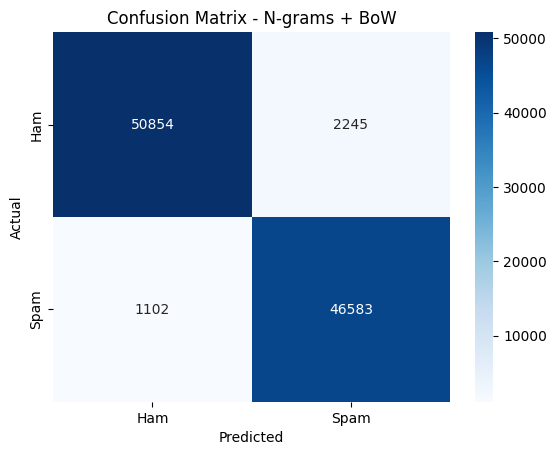

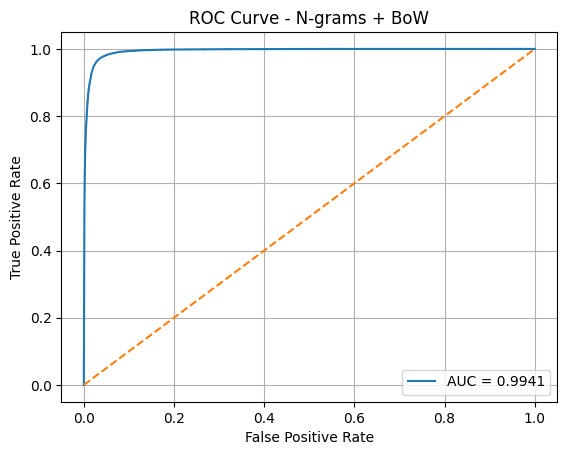

In [4]:
print(" Evaluating: N-grams + BoW")
model = LogisticRegression(max_iter=1000)
model.fit(X_ngb, y_ngb)
y_pred = model.predict(X_ngb)
y_prob = model.predict_proba(X_ngb)[:, 1]

print("Accuracy:", accuracy_score(y_ngb, y_pred))
print("Precision:", precision_score(y_ngb, y_pred))
print("Recall:", recall_score(y_ngb, y_pred))
print("F1 Score:", f1_score(y_ngb, y_pred))
print("\nClassification Report:\n", classification_report(y_ngb, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_ngb, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - N-grams + BoW")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_ngb, y_prob)
auc = roc_auc_score(y_ngb, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - N-grams + BoW")
plt.legend()
plt.grid(True)
plt.show()


🚀 Evaluating: N-grams + TF-IDF
Accuracy: 0.9670284965867598
Precision: 0.9613736583742408
Recall: 0.9692565796372025
F1 Score: 0.9652990256993974

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     53099
           1       0.96      0.97      0.97     47685

    accuracy                           0.97    100784
   macro avg       0.97      0.97      0.97    100784
weighted avg       0.97      0.97      0.97    100784



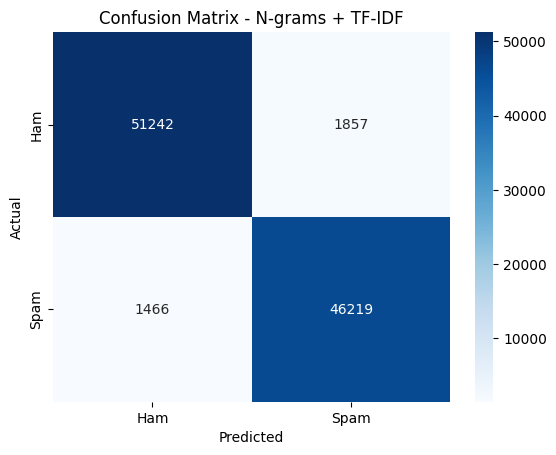

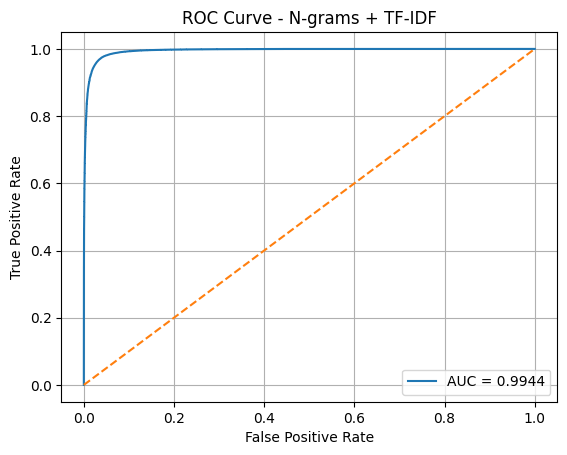

In [5]:
print(" Evaluating: N-grams + TF-IDF")
model = LogisticRegression(max_iter=1000)
model.fit(X_ngt, y_ngt)
y_pred = model.predict(X_ngt)
y_prob = model.predict_proba(X_ngt)[:, 1]

print("Accuracy:", accuracy_score(y_ngt, y_pred))
print("Precision:", precision_score(y_ngt, y_pred))
print("Recall:", recall_score(y_ngt, y_pred))
print("F1 Score:", f1_score(y_ngt, y_pred))
print("\nClassification Report:\n", classification_report(y_ngt, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_ngt, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - N-grams + TF-IDF")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_ngt, y_prob)
auc = roc_auc_score(y_ngt, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - N-grams + TF-IDF")
plt.legend()
plt.grid(True)
plt.show()


🚀 Evaluating: BoW + TF-IDF
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       522
           1       1.00      1.00      1.00       478

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



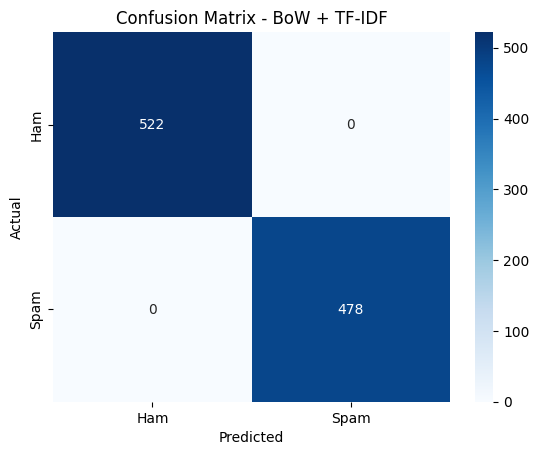

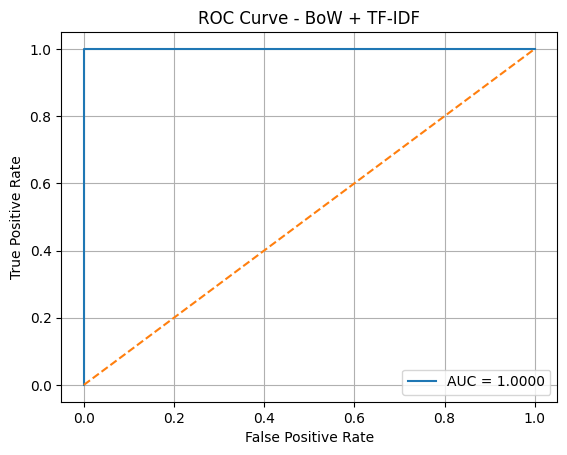

In [6]:
print(" Evaluating: BoW + TF-IDF")
model = LogisticRegression(max_iter=1000)
model.fit(X_btf, y_btf)
y_pred = model.predict(X_btf)
y_prob = model.predict_proba(X_btf)[:, 1]

print("Accuracy:", accuracy_score(y_btf, y_pred))
print("Precision:", precision_score(y_btf, y_pred))
print("Recall:", recall_score(y_btf, y_pred))
print("F1 Score:", f1_score(y_btf, y_pred))
print("\nClassification Report:\n", classification_report(y_btf, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_btf, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - BoW + TF-IDF")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_btf, y_prob)
auc = roc_auc_score(y_btf, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - BoW + TF-IDF")
plt.legend()
plt.grid(True)
plt.show()
